In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [6]:
algos = ['baseline', 'hedging', 'random', 'linnos', 'flashnet']
percentiles_characteristics = ['avg', 'p50.0', 'p80.0', 'p90.0', 'p95.0', 'p96.0', 'p97.0', 'p98.0', 'p99.0', 'p99.9', 'p99.99']

In [7]:
grouping_dirs = {}
grouping_dirs['data'] = "/mnt/extra12/Heimdall-OLD/integration/client-level/data"

## Examine the Stats

In [8]:
col_names = ['algo', 'grouping_dir', 'trace_dir'] + percentiles_characteristics
df = pd.DataFrame(columns = col_names)

for key, grouping_dir in grouping_dirs.items():
    trace_dirs_1 = [os.path.join(grouping_dir, dir) for dir in os.listdir(grouping_dir) if os.path.isdir(os.path.join(grouping_dir, dir))]
    trace_dirs_2 = []
    for trace_dir in trace_dirs_1:
        trace_dirs_2.extend([os.path.join(trace_dir, dir) for dir in os.listdir(trace_dir) if os.path.isdir(os.path.join(trace_dir, dir))])
    trace_dirs_3 = []
    for trace_dir in trace_dirs_2:
        trace_dirs_3.extend([os.path.join(trace_dir, dir) for dir in os.listdir(trace_dir) if os.path.isdir(os.path.join(trace_dir, dir))])
    trace_dirs_4 = []
    for trace_dir in trace_dirs_3:
        trace_dirs_4.extend([os.path.join(trace_dir, dir) for dir in os.listdir(trace_dir) if os.path.isdir(os.path.join(trace_dir, dir))])
    trace_dirs = trace_dirs_4

    for trace_dir in trace_dirs:
        for algo in algos:
            this_data = [algo, key, trace_dir]
            try:
                f = open(os.path.join(trace_dir, algo, "latency_characteristic.stats"), "r")
                latency_characteristic = f.readlines()
                for p in percentiles_characteristics:
                    for line in latency_characteristic:
                        if line.split(' = ')[0] == p:
                            this_data.append(float(line.split(' = ')[1].split(' us')[0]))
                df.loc[len(df)] = this_data
            except:
                print("CHAR", algo, trace_dir)

df

,algo,grouping_dir,trace_dir,avg,p50.0,p80.0,p90.0,p95.0,p96.0,p97.0,p98.0,p99.0,p99.9,p99.99
0,baseline,data,/mnt/extra12/Heimdall-OLD/integration/client-l...,394.775526,277.0,624.0,831.0,1016.0,1118.0,1188.0,1295.0,1503.0,4782.000,7337.0868
1,hedging,data,/mnt/extra12/Heimdall-OLD/integration/client-l...,383.743448,282.0,623.0,829.0,1014.0,1071.0,1146.0,1256.0,1443.0,1779.000,2113.2826
2,random,data,/mnt/extra12/Heimdall-OLD/integration/client-l...,286.801896,129.0,453.0,711.0,950.0,1025.0,1127.0,1266.0,1553.0,4711.000,7156.6956
3,linnos,data,/mnt/extra12/Heimdall-OLD/integration/client-l...,222.765653,161.0,275.0,417.0,559.0,602.0,660.0,753.0,952.0,3298.000,5034.8478
4,flashnet,data,/mnt/extra12/Heimdall-OLD/integration/client-l...,178.252308,107.0,208.0,337.0,508.0,566.0,656.0,808.0,1233.0,3839.000,5911.2826
5,baseline,data,/mnt/extra12/Heimdall-OLD/integration/client-l...,226.790902,132.0,364.0,542.0,676.0,714.0,760.0,821.0,924.0,4169.000,4834.0000
6,hedging,data,/mnt/extra12/Heimdall-OLD/integration/client-l...,223.159329,134.0,364.0,541.0,674.0,712.0,759.0,821.0,920.0,1108.000,1322.0000
7,random,data,/mnt/extra12/Heimdall-OLD/integration/client-l...,170.576665,79.0,229.0,439.0,598.0,644.0,697.0,768.0,884.0,4002.000,4806.0000
8,linnos,data,/mnt/extra12/Heimdall-OLD/integration/client-l...,246.185189,162.0,363.0,546.0,681.0,719.0,766.0,828.0,928.0,4087.000,4841.0000
9,flashnet,data,/mnt/extra12/Heimdall-OLD/integration/client-l...,123.578324,83.0,141.0,203.0,305.0,357.0,431.0,521.0,680.0,2021.000,4621.0000


In [9]:
collection = df.groupby(['algo'])[percentiles_characteristics].mean().reindex(algos)
# convert value to ms
collection_ms = collection / 1000
collection_ms

,avg,p50.0,p80.0,p90.0,p95.0,p96.0,p97.0,p98.0,p99.0,p99.9,p99.99
algo,,,,,,,,,,,
baseline,0.362621,0.226667,0.582333,0.809500,0.997333,1.064167,1.147000,1.274500,1.600167,4.750670,7.009171
hedging,0.354623,0.238833,0.585667,0.810000,0.998333,1.058500,1.139000,1.267167,1.448333,1.700529,2.339083
random,0.275775,0.135000,0.396333,0.689500,0.928167,1.003667,1.104000,1.257833,1.602333,4.712196,6.754979
linnos,0.267789,0.176667,0.351833,0.504167,0.708667,0.797167,0.907667,1.069833,1.537667,3.803997,6.215994
flashnet,0.178667,0.105833,0.198500,0.314833,0.553333,0.645333,0.761667,0.925833,1.273833,3.629663,5.961318


/tmp/ipykernel_1526126/353016753.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(label, rotation=90)


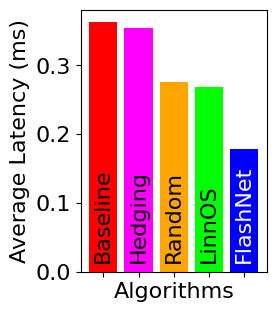

In [ ]:
plt.rcParams.update({'font.size': 16})

algos = ['baseline', 'hedging', 'random', 'linnos', 'flashnet']
label = ['Baseline', 'Hedging', 'Random', 'LinnOS', 'FlashNet']
font_colors = ['black', 'black', 'black', 'black', 'white']
colors = ['red', 'magenta', 'orange', 'lime', 'blue']

metric = "avg"

fig, ax = plt.subplots(figsize=(2.4, 3.4))
ax.bar(algos, collection_ms[metric], label=label, color=colors)
# ax.set_title('Latency at '+ metric +' (Light-Light)')
ax.set_ylabel('Average Latency (ms)')
# ax.set_ylim(0, 0.5)
# ax.set_yticklabels(["0", ".1", ".2", ".3", ".4", ".5"])
ax.set_xticklabels(label, rotation=90)
ax.set_xlabel('Algorithms')
ax.tick_params(axis='x', which='major', pad=-10)
for ticklabel, tickcolor in zip(fig.gca().get_xticklabels(), font_colors):
    ticklabel.set_color(tickcolor)
    ticklabel.set_horizontalalignment("center")
    ticklabel.set_verticalalignment("bottom")
# plt.text(-0.75, 0.5125, "(d) Light-Heavy", fontweight='bold')
# plt.text(4.72, 0.165, "et", rotation=90)
plt.savefig(os.path.join("eval-client-avg.eps"), dpi=200, bbox_inches='tight', format='eps')
plt.show()

['Baseline', 'Hedging', 'Random', 'LinnOS', 'FlashNet']


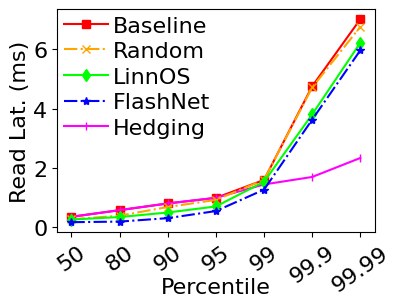

In [11]:
# Draw baseline vs flashnet line chart

algos = ['baseline', 'hedging', 'random', 'linnos', 'flashnet']
line_legend = ['Baseline', 'Hedging', 'Random', 'LinnOS', 'FlashNet']
colors = ['red', 'magenta', 'orange', 'lime', 'blue']
styles = ['s-', '|-', 'x-.', 'd-', '*-.']

x_labels = ["avg", "p80.0", "p90.0", "p95.0", "p99.0", "p99.9", "p99.99"]
x_ticks = ["50", "80", "90", "95", "99", "99.9", "99.99"]

fig, ax = plt.subplots(figsize=(4.1, 2.9))
for idx, algo in enumerate(algos):
    ax.plot(np.arange(len(x_labels)), collection_ms.loc[algo][x_labels].values, styles[idx], label=line_legend[idx], color=colors[idx], linewidth=1.5)

handles, labels = ax.get_legend_handles_labels()
print(labels)

ax.legend([handles[0], handles[2], handles[3], handles[4], handles[1]], [labels[0], labels[2], labels[3], labels[4], labels[1]], loc='upper left', frameon=False, labelspacing=0.25, columnspacing=0.5, borderpad=-0.2, handletextpad=0.2, handlelength=2)
ax.set_xticks(np.arange(len(x_ticks)), x_ticks)
ax.set_xticklabels(x_ticks, rotation=35, ha='center')
# add y label
# ax.set_ylim(0, 8)
ax.set_ylabel("Read Lat. (ms)")
ax.set_xlabel("Percentile")
ax.xaxis.set_label_coords(0.5, -0.2)
ax.yaxis.set_label_coords(-0.085, 0.5)
plt.savefig(os.path.join("eval-client-line.eps"), dpi=200, bbox_inches='tight', format='eps')
plt.show()